In [ ]:
# foto splitsen in 4 van 32x32
# 

from SimpleCV import *
from IPython.display import HTML
import matplotlib as plt
import matplotlib.image as mpimg
import pandas as pd
import cv2
import glob

4


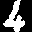

[ 246.5]
(14.435429344151453, 18.384043272481403)
-62.3540229797


In [228]:
disp = Display(displaytype='notebook')
size = 32

# postalcode = Image ('../dataset-images/1276.png')
imagelist = []
    
for shapefile in glob.glob("../dataset-images/*.png"): 
    image = Image(shapefile)
#     image.save()
    image = image.binarize()
    answer = shapefile[18:22]
    imagelist.append((answer, image))
    
numbers = []    
for image in imagelist:
    first = image[0][:1]
    numbers.append((first, image[1].crop(0, 0, size, size)))
    
    second = image[0][1:2]
    numbers.append((second, image[1].crop(size, 0, size, size*2)))
    
    third = image[0][2:3]
    numbers.append((third, image[1].crop(size*2, 0, size, size*3)))
   
    fourth = image[0][3:4]
    numbers.append((fourth, image[1].crop(size*3, 0, size, size*4)))
    

# for number in numbers:
print numbers[99][0]
num = numbers[6][1]
num.save(disp)
blobs = num.findBlobs()
num.draw(blobs, autocolor=True)
print blobs.area()
blob = blobs[0] 
# center of the blob
# bcenter = blobs.center()
# print bcenter[0]
center = num.crop(bcenter[0][0], bcenter[0][1], 1, 1)

print blob.centroid()

angle = blob.angle()
print angle

In [241]:
# divide images into pieces of 4x4
size = 8
m = np.zeros((4,4))

pieces = []
for y in range(4):
    for x in range(4):
        crop = num.crop(x*size, y*size, size, size)
        crop.save(disp)
        pieces.append(crop)
        m[x][y] = 1 if crop.meanColor()[0] > 80 else 0

print m.T

[[ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  1.  1.  0.]
 [ 0.  1.  1.  0.]]
